<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Interface_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install -q intermat ase

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.6 MB/s eta 0:00:00


### Quick interface generator given two atomic structures in POSCAR format

In [2]:
# Conventional cells
poscar_1= """JVASP1002
1.0
5.49363 0.0 0.0
-0.0 5.49363 0.0
0.0 0.0 5.49363
Si
8
direct
0.25 0.75 0.25 Si
0.0 0.0 0.5 Si
0.25 0.25 0.75 Si
0.0 0.5 0.0 Si
0.75 0.75 0.75 Si
0.5 0.0 0.0 Si
0.75 0.25 0.25 Si
0.5 0.5 0.5 Si
"""

poscar_2 = """JVASP-1174
1.0
5.73163 0.0 0.0
-0.0 5.73163 0.0
0.0 0.0 5.73163
Ga As
4 4
direct
0.0 0.0 0.0 Ga
0.0 0.5 0.5 Ga
0.5 0.0 0.5 Ga
0.5 0.5 0.0 Ga
0.25 0.75 0.75 As
0.25 0.25 0.25 As
0.75 0.75 0.25 As
0.75 0.25 0.75 As
"""


In [5]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_2).atoms

x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.0,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    dataset=[None],
    ltol=0.08,

)

structs = x.generate()
heterostructure_atoms=Atoms.from_dict(structs[0]['generated_interface'])
film_atoms=Atoms.from_dict(structs[0]['film_surf'])
surf_atoms=Atoms.from_dict(structs[0]['subs_surf'])


/usr/local/lib/python3.10/dist-packages/intermat/generate.py:52: RuntimeWarning: invalid value encountered in scalar divide
  strain_x = (
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:55: RuntimeWarning: invalid value encountered in scalar divide
  strain_y = (


In [6]:
print(heterostructure_atoms)

System
1.0
-0.0 5.73163 -0.0
8.10575 -0.0 -0.0
-0.0 -0.0 -26.343643666455268
As Ga Si 
12 12 24 
direct
0.125 -0.7499998964165412 0.8511499074085057 bottom
0.125 -0.24999996547218029 0.6973034974115482 bottom
0.125 0.24999996547218034 0.5434570874145908 bottom
-0.375 -0.4999999309443608 0.9280731124069845 bottom
-0.375 2.5442610980993176e-17 0.774226702410027 bottom
-0.375 0.4999999309443608 0.6203802924130694 bottom
-0.375 -0.9999998618887216 0.9280731124069845 bottom
-0.375 -0.4999999309443608 0.774226702410027 bottom
-0.375 2.5442610980993176e-17 0.6203802924130694 bottom
0.125 -0.2499999654721805 0.8511499074085057 bottom
0.125 0.24999996547218034 0.6973034974115482 bottom
0.125 0.7499998964165413 0.5434570874145905 bottom
0.375 0.9999998618887216 0.5434570874145905 bottom
0.375 2.5442610980993176e-17 0.6973034974115482 bottom
0.375 0.4999999309443608 0.5434570874145908 bottom
-0.125 -0.24999996547218029 0.9280731124069845 bottom
-0.125 0.24999996547218034 0.774226702410027 bottom


(0.0, 8.649890812500004, 0.0, 27.660825849778032)

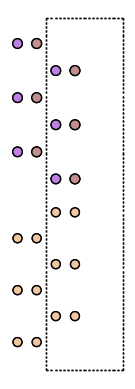

In [9]:
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
%matplotlib inline
plot_atoms(heterostructure_atoms.ase_converter(),  radii=0.3, rotation=('90x,90y,0z'))
plt.axis('off')


In [11]:
from jarvis.db.jsonutils import loadjson
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from intermat.generate import InterfaceCombi
import matplotlib.pyplot as plt

atoms1 = Poscar.from_string(poscar_1).atoms
atoms2 = Poscar.from_string(poscar_2).atoms

# disp_intvl = 0.1 for xy-plane scan
x = InterfaceCombi(
    film_indices=[[1, 1, 0]],
    subs_indices=[[1, 1, 0]],
    vacuum_interface=2,
    film_mats=[atoms1],
    subs_mats=[atoms2],
    disp_intvl=0.1,
    from_conventional_structure_film=False,
    from_conventional_structure_subs=False,
    max_area=300,
    ltol=0.08,
    dataset=[None],

)

structs = x.generate()
wads = x.calculate_wad(method='ewald')



/usr/local/lib/python3.10/dist-packages/intermat/generate.py:52: RuntimeWarning: invalid value encountered in scalar divide
  strain_x = (
/usr/local/lib/python3.10/dist-packages/intermat/generate.py:55: RuntimeWarning: invalid value encountered in scalar divide
  strain_y = (


len generated 100


100%|██████████| 100/100 [00:23<00:00,  4.19it/s]


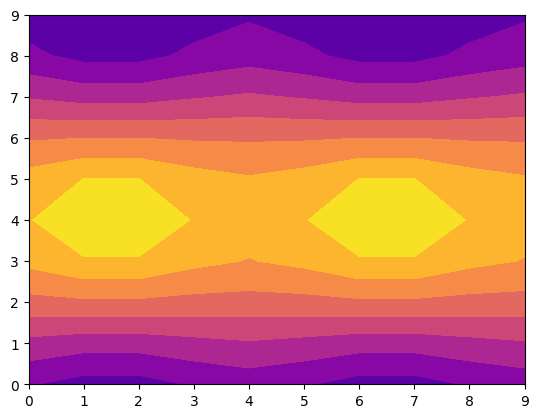

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
X = x.X
Y = x.Y
wads = np.array(wads).reshape(len(X), len(Y))
wads = np.array(x.wads["wads"])
index = np.argmin(wads)
combined_atoms = Atoms.from_dict(
    x.generated_interfaces[index]["generated_interface"]
)
wads = np.array(wads).reshape(len(X), len(Y))
plt.contourf(wads,cmap='plasma')


In [13]:
print(combined_atoms)

System
1.0
-0.0 5.73163 -0.0
8.10575 -0.0 -0.0
-0.0 -0.0 -26.343643666455268
As Ga Si 
12 12 24 
direct
0.625 -0.4499998964165412 0.8511499074085057 bottom
0.625 0.0500000345278197 0.6973034974115482 bottom
0.625 0.5499999654721803 0.5434570874145908 bottom
0.125 -0.1999999309443608 0.9280731124069845 bottom
0.125 0.3 0.774226702410027 bottom
0.125 0.7999999309443608 0.6203802924130694 bottom
0.125 -0.6999998618887215 0.9280731124069845 bottom
0.125 -0.1999999309443608 0.774226702410027 bottom
0.125 0.3 0.6203802924130694 bottom
0.625 0.05000003452781948 0.8511499074085057 bottom
0.625 0.5499999654721803 0.6973034974115482 bottom
0.625 1.0499998964165413 0.5434570874145905 bottom
0.875 1.2999998618887216 0.5434570874145905 bottom
0.875 0.3 0.6973034974115482 bottom
0.875 0.7999999309443608 0.5434570874145908 bottom
0.375 0.0500000345278197 0.9280731124069845 bottom
0.375 0.5499999654721803 0.774226702410027 bottom
0.375 1.0499998964165413 0.6203802924130694 bottom
0.375 -0.449999896416

(0.0, 8.624690812500004, 0.0, 27.660825849778032)

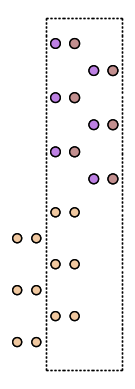

In [14]:
# After xy plane scan we can see the diamond structure pattern continues,
# which is desirable for getting low energy structure
from ase.visualize.plot import plot_atoms
import matplotlib.pyplot as plt
%matplotlib inline
plot_atoms(combined_atoms.ase_converter(),  radii=0.3, rotation=('90x,90y,0z'))
plt.axis('off')
